In [109]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [110]:
from geomdl import fitting
from geomdl import exchange
from geomdl.visualization import VisMPL as vis

In [131]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from copy import deepcopy
import json
from ast import literal_eval
from scipy.interpolate import splprep, splev

import sys; sys.path.append('../../../')
from boatbuilding.panels import *

offsets = pd.read_excel('gc_draft_1_offsets.xlsx', sheet_name='points')

offsets['x'] = np.float_(offsets.x)
offsets['y'] = np.float_(offsets.y)
offsets['z'] = np.float_(offsets.z)

offsets['y'] *= 0.9
offsets['x'] *= 1.1

offsets['x'] -= offsets.x.min()

offsets['chine'].fillna('', inplace=True)

offsets['chine'] = offsets.apply(parse_chines, axis=1)

left_offsets = make_sym_offsets(offsets)

offsets = pd.concat((offsets, left_offsets), ignore_index=True)

for i, row in offsets.iterrows():
    if row.pt[-1] == 'c':
        if isinstance(row.chine, list):
            for c in row.chine:
                if c[-1] == 'r':
                    offsets.loc[i, 'chine'].append(r_to_l(c))


chine_list = []
for ch in offsets.chine:
    if isinstance(ch, str):
        if ch not in chine_list:
            chine_list.append(ch)
    elif isinstance(ch, list):
        for c in ch:
            if c not in chine_list:
                chine_list.append(c)

chine_dfs = {}
for ch in chine_list:
    chine_dfs[ch] = pd.DataFrame(columns=['x', 'y', 'z'],
                                 dtype=float)
    cd = chine_dfs[ch]
    for i, row in offsets.iterrows():
        if ch in row.chine:
            cd.loc[row.pt, :] = np.float_((row.x, row.y, row.z))
    cd.sort_values('x', inplace=True)

/Users/itchy/src/miniconda/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
../../../boatbuilding/panels.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ldf['pt'] = [r_to_l(p) for p in ldf.pt]
../../../boatbuilding/panels.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

In [132]:
chine_splines = {}

for ch, cdf in chine_dfs.items():
    points = cdf[['x', 'y', 'z']].values.tolist()
    if len(cdf) > 4:
        points = cdf[['x', 'y', 'z']].values.tolist()
        chine_splines[ch] = {'curve': fitting.interpolate_curve(points, degree=2,
                                                                centripetal=True)}
    else:
        chine_splines[ch] = {'curve': fitting.interpolate_curve(points, degree=2,
                                                                centripetal=False)}
    chine_splines[ch]['curve'].evaluate()
    chine_splines[ch]['pts'] = np.array(chine_splines[ch]['curve']._curve_points)

<IPython.core.display.Javascript object>


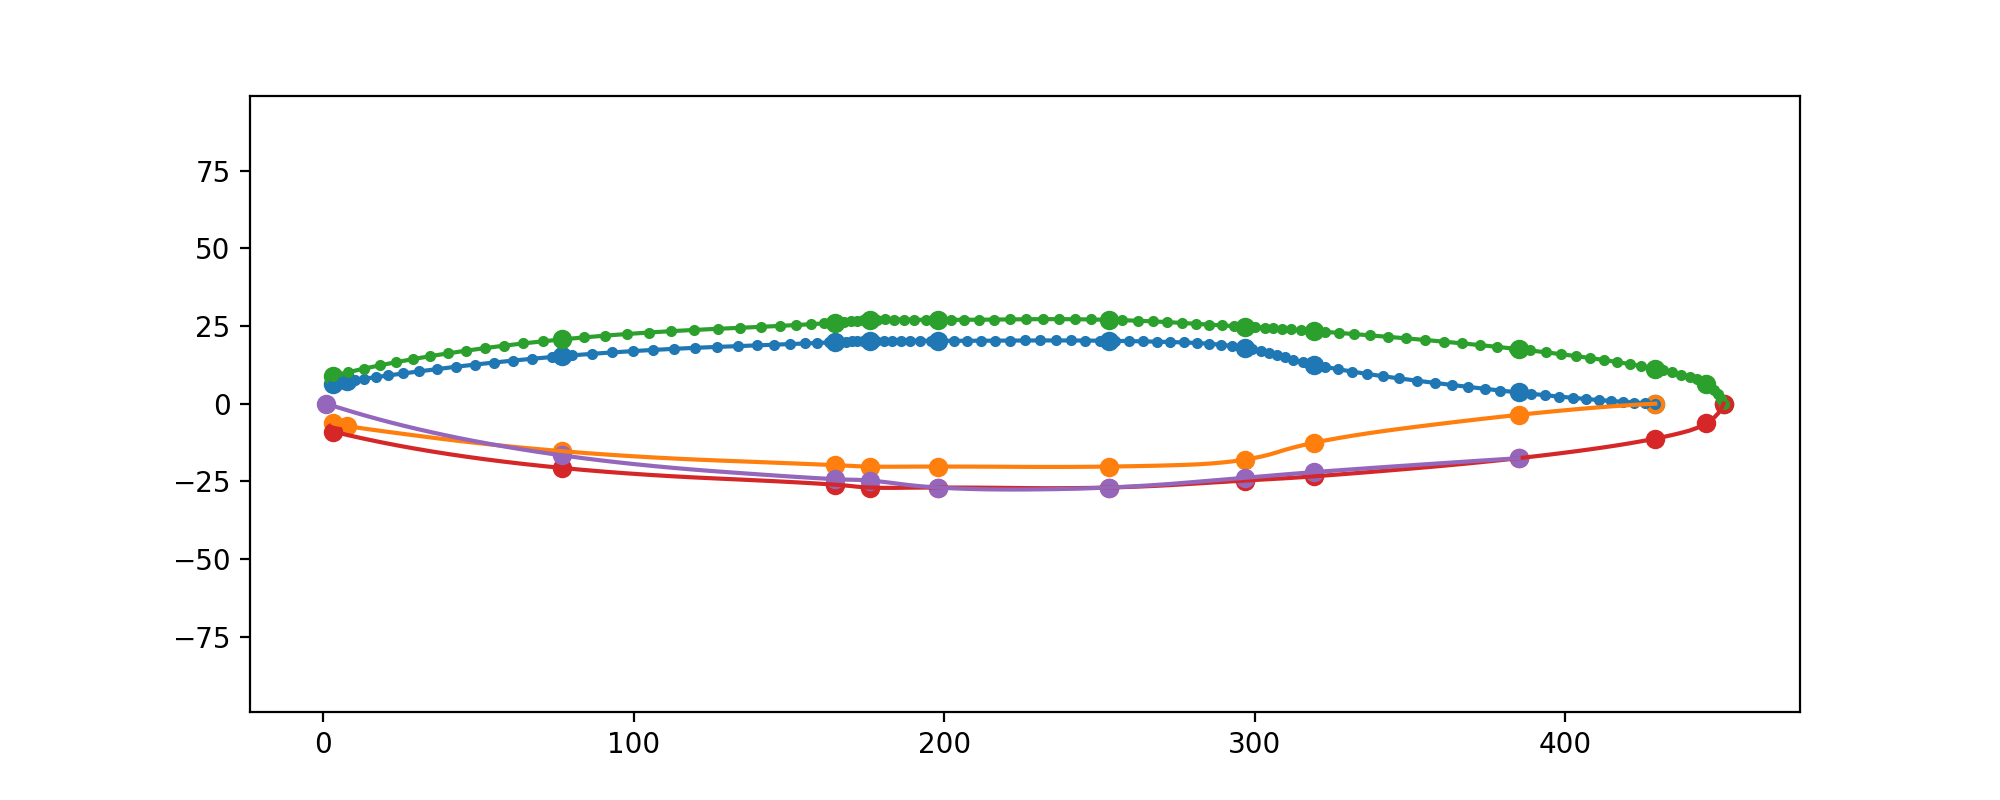

(-23.509932986569282,
 475.60913410040143,
 -30.399097516893555,
 30.191623710324585)

In [133]:
plt.figure(figsize=(10,4))
plt.scatter(chine_dfs['c1r']['x'], chine_dfs['c1r']['y'])

plt.plot(chine_splines['c1r']['pts'][:,0],
         chine_splines['c1r']['pts'][:,1],
         '.-')

plt.scatter(chine_dfs['c1l']['x'], chine_dfs['c1l']['y'])

plt.plot(chine_splines['c1l']['pts'][:,0],
         chine_splines['c1l']['pts'][:,1])


plt.scatter(chine_dfs['c2r']['x'], chine_dfs['c2r']['y'])

plt.plot(chine_splines['c2r']['pts'][:,0],
         chine_splines['c2r']['pts'][:,1],
         '.-')

plt.scatter(chine_dfs['c2l']['x'], chine_dfs['c2l']['y'])

plt.plot(chine_splines['c2l']['pts'][:,0],
         chine_splines['c2l']['pts'][:,1])

plt.scatter(chine_dfs['c3l']['x'], chine_dfs['c3l']['y'])

plt.plot(chine_splines['c3l']['pts'][:,0],
         chine_splines['c3l']['pts'][:,1])

plt.axis('equal')

<IPython.core.display.Javascript object>


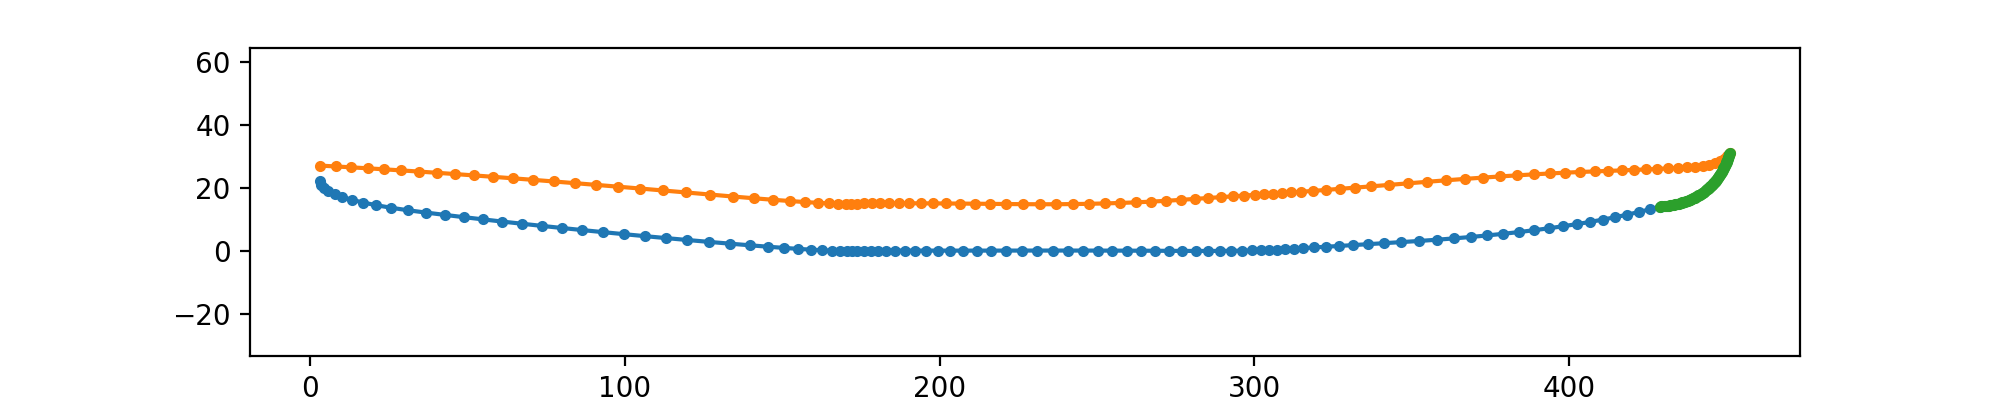

(-19.084999999999994,
 473.38500000000005,
 -1.6695175638510666,
 32.555691312564335)

In [119]:
plt.figure(figsize=(10,2))

plt.plot(chine_splines['c1r']['pts'][:,0],
         chine_splines['c1r']['pts'][:,2],
         '.-')

plt.plot(chine_splines['c2r']['pts'][:,0],
         chine_splines['c2r']['pts'][:,2],
         '.-')
plt.plot(chine_splines['c7']['pts'][:,0],
         chine_splines['c7']['pts'][:,2],
         '.-')

plt.axis('equal')

<IPython.core.display.Javascript object>


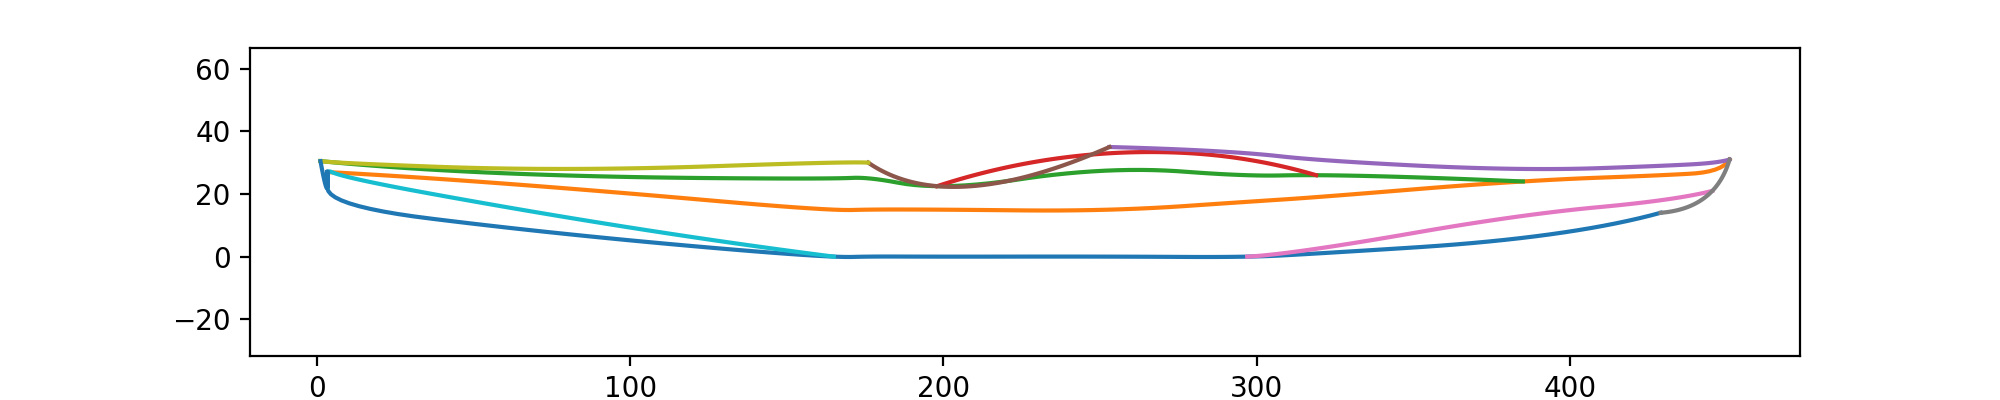

(-21.394999999999982,
 473.49500000000006,
 -1.8695175638510668,
 36.75569131256434)

In [134]:
plt.figure(figsize=(10,2))

for ch, cs in chine_splines.items():
    if ch[-1] is not 'l':
        plt.plot(cs['pts'][:,0],
                 cs['pts'][:,2])
        
plt.axis('equal')

<IPython.core.display.Javascript object>


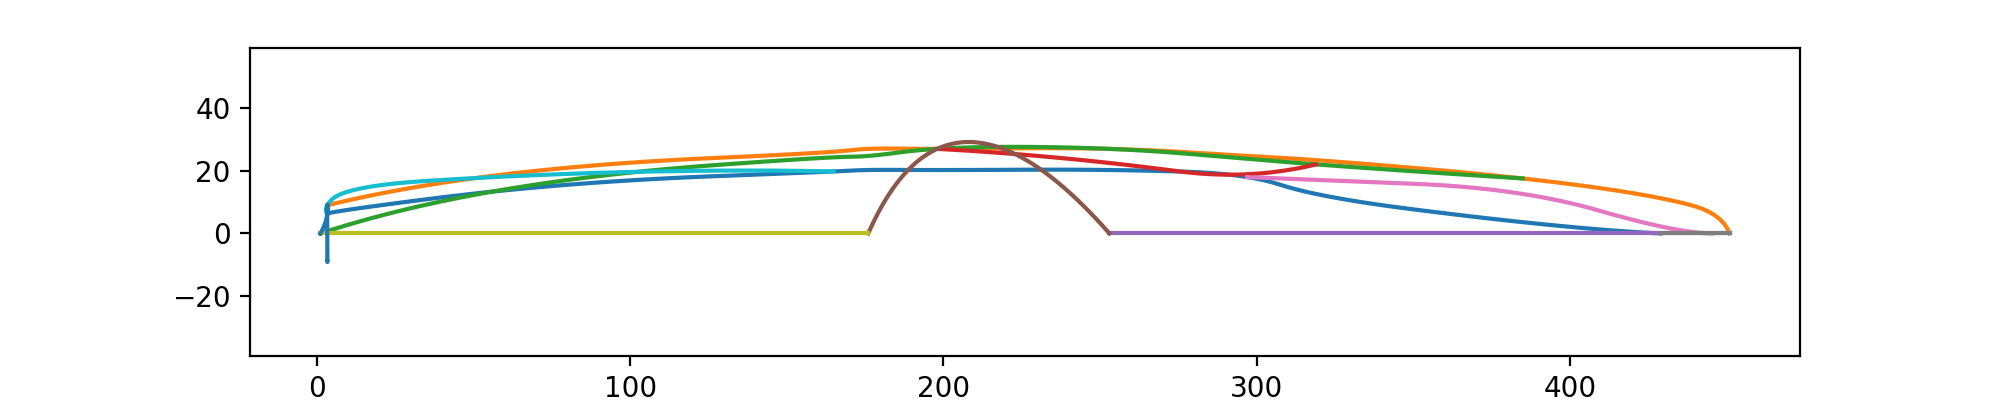

(-21.394999999999982,
 473.49500000000006,
 -11.029682604985972,
 31.108736334786872)

In [135]:
plt.figure(figsize=(10,2))

for ch, cs in chine_splines.items():
    if ch[-1] is not 'l':
        plt.plot(cs['pts'][:,0],
                 cs['pts'][:,1])
        
plt.axis('equal')

In [120]:
panel_chines = {"p0": {
                    "a": ["c1r"],
                    "b": ["c1l"]
                    },
                "p1": {
                    "a": ["c9r", "c1r", "c6r", "c7c1,"]
                }
                }